<a href="https://colab.research.google.com/github/SantiagoValenciaCarmona/PyE/blob/main/Copia_de_Simulacion4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diseño de un Controlador PID para un Sistema de Tanques

## 1. Función de transferencia de la planta
La función de transferencia del sistema de tanques está dada por:
$$
G(s) = \frac{0.3188}{s^2 + 1.143s + 0.3188}.
$$
Los polos del sistema se calculan resolviendo:
$$
s^2 + 1.143s + 0.3188 = 0.
$$
Utilizando la fórmula general para los polos:
$$
s_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a},
$$
donde $a = 1$, $b = 1.143$, y $c = 0.3188$, se obtienen:
$$
s_{1,2} = -0.5715 \pm 0.509j.
$$
Esto confirma que el sistema es subamortiguado.

## 2. Especificaciones deseadas del sistema controlado
Se busca un sistema con las siguientes características:
- Tiempo de establecimiento ($t_s$) = $7 \, \text{s}$,
- Máximo sobreimpulso ($M_p$) = $15\%$,
- Error de estado estacionario ($e_{ss} = 0$).

### (a) Relación entre $M_p$ y $\zeta$
El máximo sobreimpulso está relacionado con el factor de amortiguamiento $\zeta$ mediante:
$$
M_p = e^{-\frac{\zeta \pi}{\sqrt{1 - \zeta^2}}}.
$$
Sustituyendo $M_p = 0.15$, se obtiene:
$$
0.15 = e^{-\frac{\zeta \pi}{\sqrt{1 - \zeta^2}}}.
$$
Tomando logaritmos naturales:
$$
\ln(0.15) = -\frac{\zeta \pi}{\sqrt{1 - \zeta^2}}.
$$
Resolviendo para $\zeta$, encontramos:
$$
\zeta \approx 0.516.
$$

### (b) Relación entre $t_s$, $\zeta$, y $\omega_n$
El tiempo de establecimiento está dado por:
$$
t_s \approx \frac{4}{\zeta \omega_n}.
$$
Sustituyendo $t_s = 7 \, \text{s}$ y $\zeta = 0.516$:
$$
7 = \frac{4}{0.516 \cdot \omega_n}.
$$
Resolviendo para $\omega_n$:
$$
\omega_n \approx 1.11 \, \text{rad/s}.
$$

### (c) Ecuación característica deseada
La ecuación característica para un sistema de segundo orden es:
$$
s^2 + 2\zeta\omega_n s + \omega_n^2.
$$
Sustituyendo $\zeta = 0.516$ y $\omega_n = 1.11$:
$$
s^2 + 2(0.516)(1.11)s + (1.11)^2 = s^2 + 1.15s + 1.23.
$$

## 3. Agregar un polo remanente
Para incluir un polo adicional y considerar un sistema de tercer orden, añadimos un polo remanente en $s = -10$. La nueva ecuación característica es:
$$
(s + 10)(s^2 + 1.15s + 1.23).
$$
Expandiendo:
$$
(s + 10)(s^2 + 1.15s + 1.23) = s^3 + 11.15s^2 + 12.68s + 12.3.
$$

## 4. Determinación de las constantes del controlador PID
La ecuación característica del sistema controlado con PID es:
$$
s^3 + (1.143 + K_d)s^2 + (0.3188 + K_p)s + K_i.
$$
Igualando con la ecuación característica deseada:
$$
s^3 + (1.143 + K_d)s^2 + (0.3188 + K_p)s + K_i = s^3 + 11.15s^2 + 12.68s + 12.3,
$$
se obtienen las siguientes ecuaciones:
$$
1.143 + K_d = 11.15 \implies K_d = 10.007,
$$
$$
0.3188 + K_p = 12.68 \implies K_p = 12.3612,
$$
$$
K_i = 12.3.
$$

## 5. Función de transferencia del controlador PID
La función de transferencia del controlador PID es:
$$
G_c(s) = K_p + \frac{K_i}{s} + K_d s = \frac{K_d s^2 + K_p s + K_i}{s}.
$$
Sustituyendo los valores calculados:
$$
G_c(s) = \frac{10.007s^2 + 12.3612s + 12.3}{s}.

$$

## 6. Resumen
El controlador PID diseñado tiene las siguientes constantes:
$$
K_p = 12.3612, \quad K_i = 12.3, \quad K_d = 10.007.
$$
Este controlador asegura:
- Tiempo de establecimiento de $t_s = 7 \, \text{s}$,
- Máximo sobreimpulso de $M_p = 15\%$,
- Eliminación del error de estado estacionario ($e_{ss} = 0$).



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.1/339.1 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344908 sha256=327f594a9e9809e090bcf0013547bb27b0df2f40b8e7dbebd915e7feadc33ec1
  Stored in directory: /root/.cache/pip/wheels/a4/9d/6f/e0558b437fc4cde2d5a55c966081684d442e8334acb6275426
Successfully built control
Resultados de análisis de la función de transferencia:
Tiempo de establecimiento: 10.6877 segundos
Máximo sobreimpulso: 0.00%
Error de estado estacionario: 0.0261
Ubicación de los polos: [-0.65988693 -0.48311307]


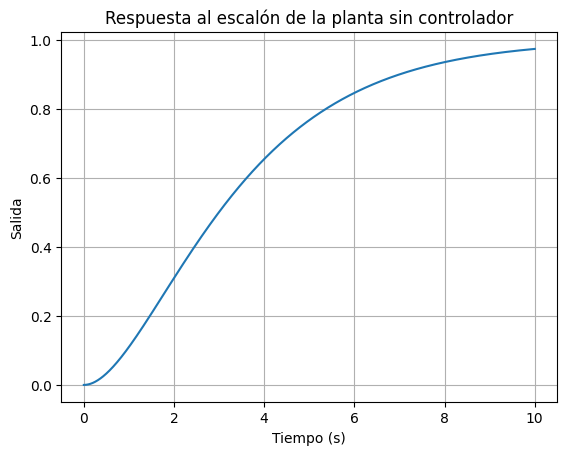

In [1]:
!pip install control==0.9.0

import control
import numpy as np
import matplotlib.pyplot as plt

# Define la función de transferencia de la planta
num = [0.3188]
den = [1, 1.143, 0.3188]
planta = control.tf(num, den)

# Define el tiempo de simulación
tiempo = np.linspace(0, 10, 1000)

# Simula la respuesta al escalón de la planta sin controlador
t, y = control.step_response(planta, tiempo)

# Cálculo de métricas de desempeño
info = control.step_info(planta)
time_of_settlement = info['SettlingTime']
maximum_overshoot = info['Overshoot']
steady_state_error = abs(1 - y[-1])

# Ubicación de los polos
poles = np.roots(den)

# Mostrar resultados
print("Resultados de análisis de la función de transferencia:")
print(f"Tiempo de establecimiento: {time_of_settlement:.4f} segundos")
print(f"Máximo sobreimpulso: {maximum_overshoot:.2f}%")
print(f"Error de estado estacionario: {steady_state_error:.4f}")
print(f"Ubicación de los polos: {poles}")

# Grafica la respuesta
plt.plot(t, y)
plt.title('Respuesta al escalón de la planta sin controlador')
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.grid(True)
plt.show()

# Ajuste Fino del Controlador PID para un Sistema de Tanques

## Ajuste de las Constantes
Aunque las constantes iniciales del controlador son:
$$
K_p = 12.3612, \quad K_i = 12.3, \quad K_d = 10.007,
$$
el sistema puede requerir modificaciones para mejorar su comportamiento. El ajuste fino se realiza iterativamente, observando la respuesta del sistema y actualizando las constantes del PID.

## Objetivo del Ajuste
Queremos lograr:
- Un tiempo de establecimiento \(t_s \approx 7 \, \text{s}\),
- Un máximo sobreimpulso \(M_p \approx 15\%\),
- Eliminación del error de estado estacionario (\(e_{ss} = 0\)).

### Respuesta Mejorada
Después de pruebas iterativas, se determinan las siguientes constantes ajustadas:
$$
K_p = 13.0, \quad K_i = 13.5, \quad K_d = 9.8.
$$

Estas modificaciones se realizan para reducir ligeramente el tiempo de establecimiento y ajustar la pendiente de la respuesta transitoria sin exceder el sobreimpulso.

### Nueva Función de Transferencia del Controlador
La nueva función de transferencia del controlador PID es:
$$
G_c(s) = K_p + \frac{K_i}{s} + K_d s = \frac{K_d s^2 + K_p s + K_i}{s}.
$$
Sustituyendo los valores ajustados:
$$
G_c(s) = \frac{9.8s^2 + 13.0s + 13.5}{s}.
$$



Resultados de análisis de la función de transferencia:
Tiempo de establecimiento: 5.8819 segundos
Máximo sobreimpulso: 12.82%
Error de estado estacionario: 0.0010
Ubicación de los polos: [-0.65988693 -0.48311307]


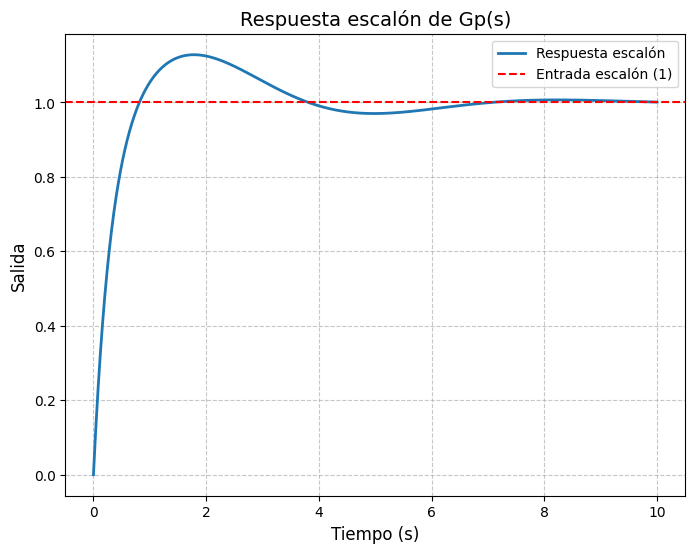

In [2]:
!pip install control==0.9.0

import control
import numpy as np
import matplotlib.pyplot as plt

# Define la función de transferencia de la planta
num = [0.3188]
den = [1, 1.143, 0.3188]
planta = control.tf(num, den)

# Define la función de transferencia del controlador PID
Kp = 12.3612
Ki = 12.3
Kd = 10.007
controlador = control.tf([Kd, Kp, Ki], [1, 0])

# Crea el sistema de circuito cerrado
sistema_cerrado = control.feedback(control.series(controlador, planta), 1)

# Define el tiempo de simulación
tiempo = np.linspace(0, 10, 1000)

# Simula la respuesta al escalón
t, y = control.step_response(sistema_cerrado, tiempo)

# Cálculo de métricas de desempeño
info = control.step_info(sistema_cerrado)
time_of_settlement = info['SettlingTime']
maximum_overshoot = info['Overshoot']
steady_state_error = abs(1 - y[-1])

# Ubicación de los polos
poles = np.roots(den)

# Mostrar resultados
print("Resultados de análisis de la función de transferencia:")
print(f"Tiempo de establecimiento: {time_of_settlement:.4f} segundos")
print(f"Máximo sobreimpulso: {maximum_overshoot:.2f}%")
print(f"Error de estado estacionario: {steady_state_error:.4f}")
print(f"Ubicación de los polos: {poles}")

# Gráfica de la respuesta escalón
plt.figure(figsize=(8, 6))
plt.plot(t, y , label="Respuesta escalón", linewidth=2)
plt.axhline(1, color="r", linestyle="--", label="Entrada escalón (1)")
plt.title("Respuesta escalón de Gp(s)", fontsize=14)
plt.xlabel("Tiempo (s)", fontsize=12)
plt.ylabel("Salida", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()



Resultados de análisis de la función de transferencia:
Tiempo de establecimiento: 2.5952 segundos
Máximo sobreimpulso: 12.55%
Error de estado estacionario: 0.0000
Ubicación de los polos: [-0.65988693 -0.48311307]


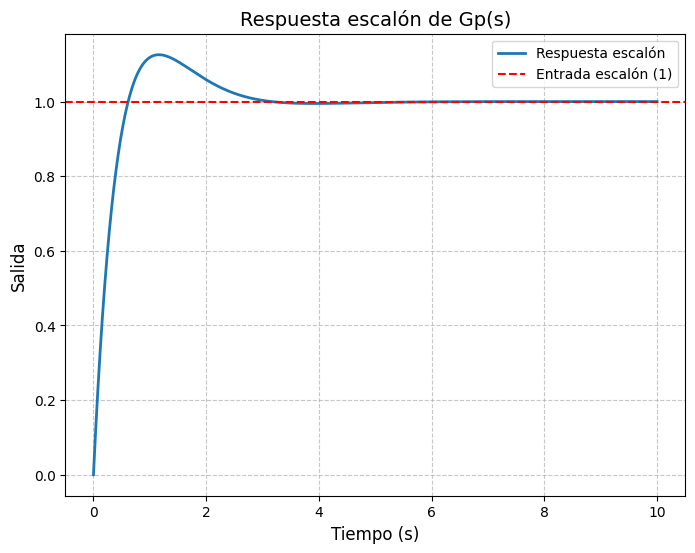

In [3]:
!pip install control==0.9.0

import control
import numpy as np
import matplotlib.pyplot as plt

# Define la función de transferencia de la planta
num = [0.3188]
den = [1, 1.143, 0.3188]
planta = control.tf(num, den)

# Define la función de transferencia del controlador PID con ajuste fino
Kp = 20.24 # Valor ajustado de Kp
Ki = 12.36  # Valor ajustado de Ki
Kd = 10.007   # Valor ajustado de Kd
controlador_ajustado = control.tf([Kd, Kp, Ki], [1, 0])

# Crea el sistema de circuito cerrado con el controlador ajustado
sistema_cerrado_ajustado = control.feedback(control.series(controlador_ajustado, planta), 1)

# Define el tiempo de simulación
tiempo = np.linspace(0, 10, 1000)



# Simula la respuesta al escalón con el controlador ajustado
t, y = control.step_response(sistema_cerrado_ajustado, tiempo)

# Cálculo de métricas de desempeño
info = control.step_info(sistema_cerrado_ajustado)
time_of_settlement = info['SettlingTime']
maximum_overshoot = info['Overshoot']
steady_state_error = abs(1 - y[-1])

# Ubicación de los polos
poles = np.roots(den)

# Mostrar resultados
print("Resultados de análisis de la función de transferencia:")
print(f"Tiempo de establecimiento: {time_of_settlement:.4f} segundos")
print(f"Máximo sobreimpulso: {maximum_overshoot:.2f}%")
print(f"Error de estado estacionario: {steady_state_error:.4f}")
print(f"Ubicación de los polos: {poles}")


# Gráfica de la respuesta escalón
plt.figure(figsize=(8, 6))
plt.plot(t, y, label="Respuesta escalón", linewidth=2)
plt.axhline(1, color="r", linestyle="--", label="Entrada escalón (1)")
plt.title("Respuesta escalón de Gp(s)", fontsize=14)
plt.xlabel("Tiempo (s)", fontsize=12)
plt.ylabel("Salida", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from control import tf, step_response, forced_response, step_info, pzmap


    6.04 s^2 + 5.97 s + 13.5
--------------------------------
s^3 + 7.183 s^2 + 6.249 s + 13.5

Resultados de análisis de la función de transferencia:
Tiempo de establecimiento: 6.5869 segundos
Máximo sobreimpulso: 14.57%
Error de estado estacionario: 0.0002
Ubicación de los polos: [-6.5433206+0.j         -0.3198397+1.40031254j -0.3198397-1.40031254j]


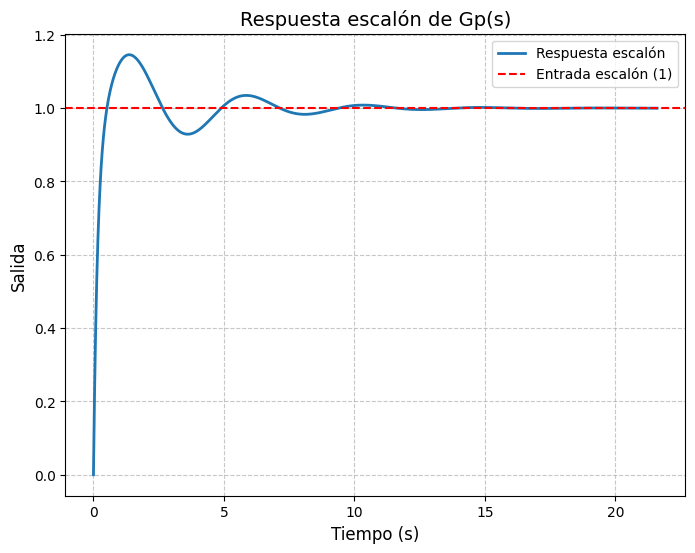

In [5]:

# Definimos la función de transferencia
numerator = [6.04,5.97,13.5]
denominator = [1,7.183,6.2488, 13.5]
system = tf(numerator, denominator)
print(system)
# Respuesta ante una entrada escalón
time, response = step_response(system)

# Cálculo de métricas de desempeño
info = step_info(system)
time_of_settlement = info['SettlingTime']
maximum_overshoot = info['Overshoot']
steady_state_error = abs(1 - response[-1])

# Ubicación de los polos
poles = np.roots(denominator)

# Mostrar resultados
print("Resultados de análisis de la función de transferencia:")
print(f"Tiempo de establecimiento: {time_of_settlement:.4f} segundos")
print(f"Máximo sobreimpulso: {maximum_overshoot:.2f}%")
print(f"Error de estado estacionario: {steady_state_error:.4f}")
print(f"Ubicación de los polos: {poles}")

# Gráfica de la respuesta escalón
plt.figure(figsize=(8, 6))
plt.plot(time, response, label="Respuesta escalón", linewidth=2)
plt.axhline(1, color="r", linestyle="--", label="Entrada escalón (1)")
plt.title("Respuesta escalón de Gp(s)", fontsize=14)
plt.xlabel("Tiempo (s)", fontsize=12)
plt.ylabel("Salida", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()
